<a href="https://colab.research.google.com/github/Makhmoor-fiza/Colab-Notebooks/blob/main/EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install tensorflow opencv-python-headless

# Import libraries
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Unzip the dataset
zip_path = '/content/drive/My Drive/nail_dataset_october.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/nail_dataset')

# Set dataset paths
train_dir = '/content/nail_dataset/nail_dataset/train'
test_dir = '/content/nail_dataset/nail_dataset/test'

Mounted at /content/drive


In [2]:
# Image parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=42
)

# Validation data generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=42
)


Found 587 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [3]:
# Define the model using EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)

# Freeze the base model
base_model.trainable = False

# Create the full model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10  # You can adjust the number of epochs
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.4984 - loss: 0.6945 - val_accuracy: 0.5469 - val_loss: 0.6908
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5312 - loss: 0.6913

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.5312 - loss: 0.6913 - val_accuracy: 0.3684 - val_loss: 0.7035
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.5047 - loss: 0.6937 - val_accuracy: 0.5078 - val_loss: 0.6947
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5938 - loss: 0.6815 - val_accuracy: 0.6316 - val_loss: 0.6759
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.5562 - loss: 0.6882 - val_accuracy: 0.5391 - val_loss: 0.6901
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5312 - loss: 0.6918 - val_accuracy: 0.4211 - val_loss: 0.7050
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.5354 - loss: 0.6903 - val_accuracy: 0.5156 - val_loss: 0.6926
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5312 - loss: 0.6902 - val_accuracy: 0.5789 - val_loss: 0.6881
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.5055 - loss: 0.6942 - val_accuracy: 0.5312 - val_loss: 0.69

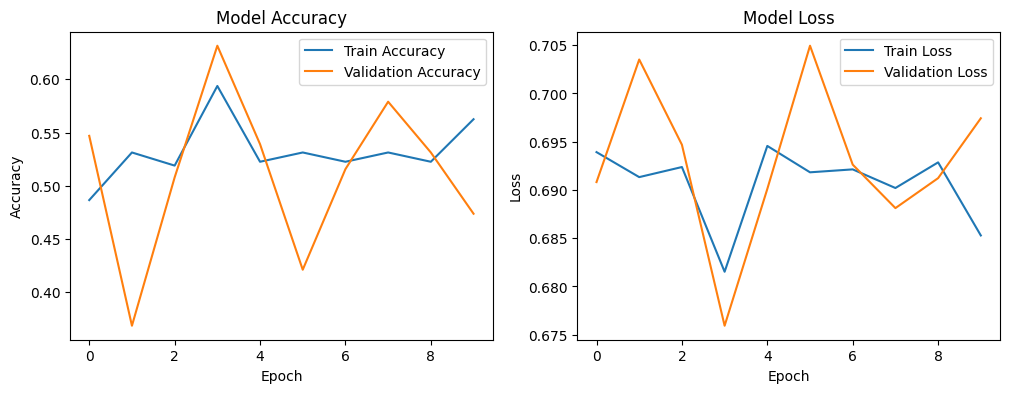

In [7]:
# Save the model
model.save('/content/nail_classifier.h5')

# Plotting training and validation accuracy and loss
def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

plot_metrics(history)

# Function for loading and preprocessing an image
def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img


In [11]:
from google.colab import files
import shutil

# Upload an image file
uploaded = files.upload()

# Save the uploaded image to a temporary location
for filename in uploaded.keys():
    # Use the uploaded file directly
    sample_image_path = filename
    print(f'Uploaded file: {sample_image_path}')

# Load and preprocess the uploaded image
sample_image = load_and_preprocess_image(sample_image_path)

# Make predictions
prediction = model.predict(sample_image)
predicted_class = 'healthy' if prediction[0][0] < 0.5 else 'melanoma'
print(f'The predicted class is: {predicted_class}')


Saving NAILwue_27_(1).jpg to NAILwue_27_(1).jpg
Uploaded file: NAILwue_27_(1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
The predicted class is: healthy
